## Fronteira Eficiente de Markowitz

In [1]:
# vamos importar os módulos necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

### Vamos usar os dados do Yahoo Finance ou do Google Finance

In [5]:
# download dos dados pelo Yahoo Finance!

start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)
acoes = ['PETR4.SA', 'VALE3.SA', 'UNIP6.SA', 'FESA4.SA', 'BPAN4.SA']
dados = web.get_data_yahoo(acoes, start, end)['Adj Close']

In [6]:
# checando os dados
dados.describe()

Symbols,BPAN4.SA,FESA4.SA,PETR4.SA,UNIP6.SA,VALE3.SA
count,246.000000,246.000000,246.000000,246.000000,246.000000
mean,1.794170,19.358568,19.946663,27.257396,49.061652
std,0.116716,1.714116,3.067558,6.907701,5.907157
min,1.567429,16.149858,13.756917,11.897977,38.779011
25%,1.695584,18.148704,17.795563,20.587870,43.561897
50%,1.813081,19.119445,19.623654,30.598358,49.939991
75%,1.873029,20.482829,21.816600,32.621472,53.283892
max,2.194782,24.554647,26.783701,38.276089,62.200001


In [7]:
dados.tail()

Symbols,BPAN4.SA,FESA4.SA,PETR4.SA,UNIP6.SA,VALE3.SA
Date,,,,,
2018-12-20,1.853313,20.289722,20.521227,30.369736,49.810001
2018-12-21,1.863171,19.710014,20.578520,32.102646,50.860001
2018-12-26,1.942035,19.487797,21.414724,31.592932,50.439999
2018-12-27,1.882887,19.632721,21.404846,31.142780,49.500000
2018-12-28,1.922319,19.857462,22.402489,31.312653,51.000000


### Calculando os retornos

In [8]:
# calculo dos retornos diários e anuais
retorno_diario = dados.pct_change()
retorno_anual = retorno_diario.mean() * 250

In [11]:
retorno_diario.tail()

Symbols,BPAN4.SA,FESA4.SA,PETR4.SA,UNIP6.SA,VALE3.SA
Date,,,,,
2018-12-20,-0.020833,0.008645,-0.034157,-0.008894,-0.003999
2018-12-21,0.005319,-0.028572,0.002792,0.057060,0.021080
2018-12-26,0.042328,-0.011274,0.040635,-0.015878,-0.008258
2018-12-27,-0.030457,0.007437,-0.000461,-0.014248,-0.018636
2018-12-28,0.020942,0.011447,0.046608,0.005455,0.030303


### Calculando a covariância

In [12]:
# cálculo da covariância diária e anual
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 250

### Criando listas para armanezar as principais variáveis

In [13]:
# vamos criar 4 listas para armazenar os valores do retorno da carteira, o peso de cada ação, a volatilidade e o sharpe ratio
# empty lists to store returns, volatility and weights of imiginary portfolios
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []

### Simulando o número de portfólios

In [14]:
# vamos usar uma simulação aleatória
numero_acoes = len(acoes)
numero_carteiras = 100000

np.random.seed(101)

In [15]:
# vamos fazer um for loop para preencher as lista que criamos anteriormente
for cada_carteira in range(numero_carteiras):
    # vamos dar um peso aleatório para cada ação dentro de cada carteira
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    # vamos calcular o retorno das carteiras
    retorno = np.dot(peso, retorno_anual)
    # vamos calcular a volatilidade das carteiras
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    # vamos calcular o índice de Sharpe de cada carteira
    sharpe = retorno / volatilidade
    # aqui nós usamos o método apend para incluir cada carteira nas listas criadas anteriormente
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)

### Criando dicionário com os dados

In [17]:
carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

for contar,acao in enumerate(acoes):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_acoes]

# vamos transformar nosso dicionário em um dataframe
df = pd.DataFrame(carteira)

# vamos nomear as colunas do novo dataframe
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]
df = df[colunas]

### Criando o gráfico da fronteira eficiente

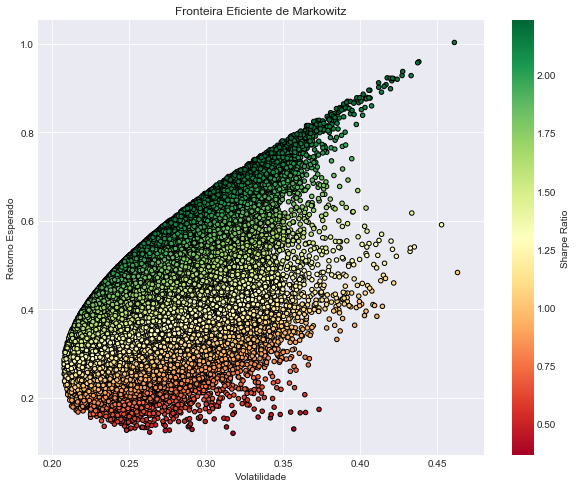

In [18]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Identificando o melhor Sharpe Ratio e a carteira de mínima variância

In [19]:
# vamos identificar as variáveis de interesse
menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()

# vamos identificar os dois principais portfolios
carteira_sharpe = df.loc[df['Sharpe Ratio'] == maior_sharpe]
carteira_min_variancia = df.loc[df['Volatilidade'] == menor_volatilidade]

### Criando novo gráfico da fronteira eficiente

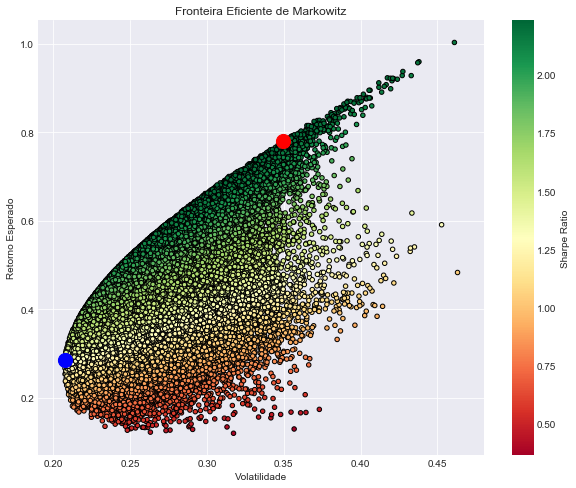

In [23]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='red', marker='o', s=200)
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'], c='blue', marker='o', s=200 )
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Analisando as duas principais carteiras

In [42]:
print "Essa é a carteira de Mínima Variância:", '\n', carteira_min_variancia.T
print '\n'
print "Essa é a carteira com maior Sharpe Ratio:", '\n', carteira_sharpe.T

Essa é a carteira de Mínima Variância: 
                  90085
Retorno        0.286472
Volatilidade   0.207567
Sharpe Ratio   1.380140
PETR4.SA Peso  0.423316
VALE3.SA Peso  0.138810
UNIP6.SA Peso  0.005294
FESA4.SA Peso  0.111733
BPAN4.SA Peso  0.320848


Essa é a carteira com maior Sharpe Ratio: 
                  95981
Retorno        0.780803
Volatilidade   0.349274
Sharpe Ratio   2.235501
PETR4.SA Peso  0.087937
VALE3.SA Peso  0.009844
UNIP6.SA Peso  0.126910
FESA4.SA Peso  0.571044
BPAN4.SA Peso  0.204265
